In [1]:
#GREEDY BFS FUNCTION
from priorityQueue import PriorityQueue
from graph import Graph

g = {
        'SC':[('Siwaka',450)],
        'Siwaka':[('Ph.1A',10), ('Ph.1B',230)],
        'Ph.1A':[('Ph.1B',100),('Mada',850)],
        'Ph.1B':[('STC',50), ('Ph.2',112)],
        'STC':[('Ph.2',50), ('PL',250)],
        'Ph.2':[('Ph.3',500), ('J1',600)],
        'J1':[('Mada',200)],
        'Ph.3':[('PL',350)],
        'Mada':[('PL',700)]
    }

def gbfs(start_node, end_node, graph_input={}):
    path = []
    myQueue = PriorityQueue()
    graph = Graph(g)
    
    start_node = start_node
    end_node = end_node

#     print(start_node, end='')
    # start = graph.get_node_details(start_node)
    current_node = [start_node]

    while current_node[0] != end_node:
        
        current_node = graph.return_edges(current_node[0])
        myQueue.makeEmpty()
        
        for item in current_node:
            myQueue.insert(item)

        current_node = myQueue.delete()
        path.append(current_node[0])

    return path

result = gbfs('SC', 'PL')

print('Greedy BFS: ')
print('Greedy BFS:' result)

['Siwaka', 'Ph.1A', 'Ph.1B', 'STC', 'Ph.2', 'Ph.3', 'PL']


{('SC', 'Siwaka'): Text(1.0, 0.0, '450'),
 ('Siwaka', 'Ph.1A'): Text(3.0, 0.0, '10'),
 ('Siwaka', 'Ph.1B'): Text(3.0, -1.0, '230'),
 ('Ph.1A', 'Ph.1B'): Text(4.0, -1.0, '100'),
 ('Ph.1A', 'Mada'): Text(7.0, -1.0, '850'),
 ('Ph.1B', 'STC'): Text(4.0, -3.0, '50'),
 ('Ph.1B', 'Ph.2'): Text(5.0, -2.0, '112'),
 ('Mada', 'PL'): Text(9.0, -4.0, '700'),
 ('Mada', 'J1'): Text(9.0, -2.0, '200'),
 ('STC', 'Ph.2'): Text(5.0, -3.0, '50'),
 ('STC', 'PL'): Text(6.0, -5.0, '250'),
 ('PL', 'Ph.3'): Text(8.0, -5.0, '350'),
 ('Ph.2', 'J1'): Text(7.0, -2.0, '600'),
 ('Ph.2', 'Ph.3'): Text(7.0, -3.0, '500')}

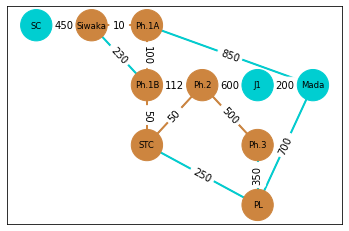

In [2]:
#DRAWING
# importing networkx
import networkx as nx
# importing matplotlib.pyplot
import matplotlib.pyplot as plt
from classes.bfs import BfsTraverser
 
g = nx.Graph()

nodes=["SC","Siwaka","Ph.1A","Ph.1B","Mada","STC","PL","Ph.2","Ph.3","J1"]
g.add_nodes_from(nodes)
#g.nodes()#confirm nodes

#Add Edges and their weights
g.add_edge("SC","Siwaka",weight="450")
g.add_edge("Siwaka","Ph.1A",weight="10")
g.add_edge("Siwaka","Ph.1B",weight="230")
g.add_edge("Ph.1A","Ph.1B",weight="100")
g.add_edge("Ph.1A","Mada",weight="850")
g.add_edge("Ph.1B","STC",weight="50")
g.add_edge("Ph.1B","Ph.2",weight="112")
g.add_edge("STC","Ph.2",weight="50")
g.add_edge("STC","PL",weight="250")
g.add_edge("Ph.2","J1",weight="600")
g.add_edge("Ph.2","Ph.3",weight="500")
g.add_edge("Ph.3","PL",weight="350")
g.add_edge("Mada","PL",weight="700")
g.add_edge("J1","Mada",weight="200")
#Position the nodes to resemble Strathmore map
g.nodes["SC"]['pos']=(0,0)
g.nodes["Siwaka"]['pos']=(2,0)
g.nodes["Ph.1A"]['pos']=(4,0)
g.nodes["Ph.1B"]['pos']=(4,-2)
g.nodes["STC"]['pos']=(4,-4)
g.nodes["Ph.2"]['pos']=(6,-2)
g.nodes["J1"]['pos']=(8,-2)
g.nodes["Ph.3"]['pos']=(8,-4)
g.nodes["PL"]['pos']=(8,-6)
g.nodes["Mada"]['pos']=(10,-2)
#Store all positions in a variable
node_pos = nx.get_node_attributes(g,'pos')

route_list = result
#color the nodes in the route_bfs
node_col = ['darkturquoise' if not node in route_list else 'peru' for node in g.nodes()]
peru_colored_edges = list(zip(route_list,route_list[1:]))
#color the edges as well
#print(peru_colored_edges)
edge_col = ['darkturquoise' if not edge in peru_colored_edges else 'peru' for edge in g.edges()]

arc_weight=nx.get_edge_attributes(g,'weight')
nx.draw_networkx(g, node_pos, node_size=980, font_size=8.5, node_color= node_col)
nx.draw_networkx_edges(g, node_pos, width=2, edge_color= edge_col)
nx.draw_networkx_edge_labels(g, node_pos, edge_labels=arc_weight)




#plt.savefig("filename.png")

In [3]:
from collections import defaultdict
from queue import PriorityQueue



#UCS
class Graph:
    def __init__(self, directed):
        self.graph = defaultdict(list)
        self.directed = directed

    def add_edge(self, u, v, weight):
        if self.directed:
            value = (weight, v)
            self.graph[u].append(value)
        else:
            value = (weight, v)
            self.graph[u].append(value)
            value = (weight, u)
            self.graph[v].append(value)

    def ucs(self, current_node, goal_node):
        visited = []
        queue = PriorityQueue()
        queue.put((0, current_node))

        while not queue.empty():
            item = queue.get()
            current_node = item[1]

            if current_node == goal_node:
                print(current_node, end=" ")
                queue.queue.clear()
            else:
                if current_node in visited:
                    continue

                print(current_node, end=" ")
                visited.append(current_node)
        

                for neighbour in self.graph[current_node]:
                    queue.put((neighbour[0], neighbour[1]))



g = Graph(False)

g.graph = defaultdict(list)

#Add Edges and their weights
g.add_edge("SC","Siwaka",450)
g.add_edge("Siwaka","Ph.1A",10)
g.add_edge("Siwaka","Ph.1B",230)
g.add_edge("Ph.1A","Ph.1B",100)
g.add_edge("Ph.1A","Mada",850)
g.add_edge("Ph.1B","STC",50)
g.add_edge("Ph.1B","Ph.2",112)
g.add_edge("STC","Ph.2",50)
g.add_edge("STC","PL",250)
g.add_edge("Ph.2","J1",600)
g.add_edge("Ph.2","Ph.3",500)
g.add_edge("Ph.3","PL",350)
g.add_edge("Mada","PL",700)
g.add_edge("J1","Mada",200)

g.graph = defaultdict(list,
                     {
                         "SC":[(450, "Siwaka")],
                         "Siwaka":[(10, "Ph.1A"),(230,"Ph.1B")],
                         "Ph.1A":[(100, "Ph.1B"),(850, "Mada")],
                         "Ph.1B":[(50, "STC"),(112, "Ph.2")],
                         "STC":[(50, "Ph.2"),(250, "PL")],
                         "Ph.2":[(600, "J1"),(500, "Ph.3")],
                         "Ph.3":[(350, "PL")],
                         "Mada":[(700, "PL")],
                         "J1":[(200, "Mada")]
                     })


print(" Uniform Cost Search: ",end=" ")
g.ucs('SC', 'PL')



 Uniform Cost Search:  SC Siwaka Ph.1A Ph.1B STC Ph.2 PL 